# Bitcoin Exploratory Data Analysis

Dataset availabe at https://www.kaggle.com/datasets/jkraak/bitcoin-price-dataset/data

Import necessary libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import mplfinance as mpf
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


View the data

In [3]:
df = pd.read_csv('bitcoin_2017_to_2023.csv')
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [4]:
len(df)

3126000

In [5]:
df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


In [6]:
df.dtypes

timestamp                        object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
quote_asset_volume              float64
number_of_trades                  int64
taker_buy_base_asset_volume     float64
taker_buy_quote_asset_volume    float64
dtype: object

In [7]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
df =df.sort_values(by='timestamp', ascending=True)

In [9]:
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [10]:
df = df.set_index('timestamp')

In [11]:
df.head()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [12]:
df['2017-08-19 00:00:00':'2017-08-19 23:59:00']

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
timestamp,,,,,,,,,
2017-08-19 00:00:00,4108.37,4108.37,4108.37,4108.37,0.711854,2924.559618,5,0.711854,2924.559618
2017-08-19 00:01:00,4108.37,4108.37,4106.44,4106.44,0.317270,1303.323443,6,0.289158,1187.828946
2017-08-19 00:02:00,4106.44,4106.44,4106.44,4106.44,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 00:03:00,4106.44,4106.44,4106.44,4106.44,0.798665,3279.669903,4,0.709813,2914.804496
2017-08-19 00:04:00,4106.44,4106.44,4106.44,4106.44,0.000000,0.000000,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2017-08-19 23:55:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 23:56:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000
2017-08-19 23:57:00,4139.98,4139.98,4139.98,4139.98,0.000000,0.000000,0,0.000000,0.000000


In [13]:
summary = df.describe()
summary = summary.astype(int)
summary

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3126000,3126000,3126000,3126000,3126000,3126000,3126000,3126000,3126000
mean,20089,20102,20076,20089,52,1155882,1018,26,572721
std,16058,16069,16048,16058,97,2335868,1817,49,1193135
min,2830,2830,2817,2817,0,0,0,0,0
25%,7624,7629,7620,7624,11,112233,150,5,51250
50%,11699,11706,11692,11700,23,370646,413,11,175369
75%,29899,29907,29890,29899,53,1276762,1026,26,621025
max,69000,69000,68786,69000,5877,145955668,107315,3537,89475505


In [14]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



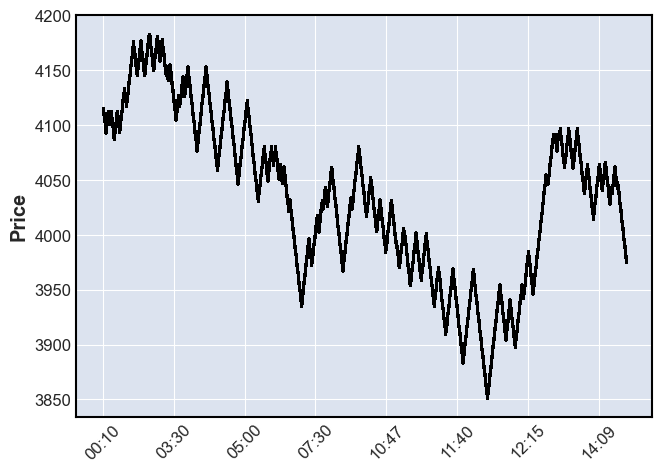

In [15]:
mpf.plot(df['2017-08-19 00:09:30':'2017-08-19 16:00:00'], type='renko')

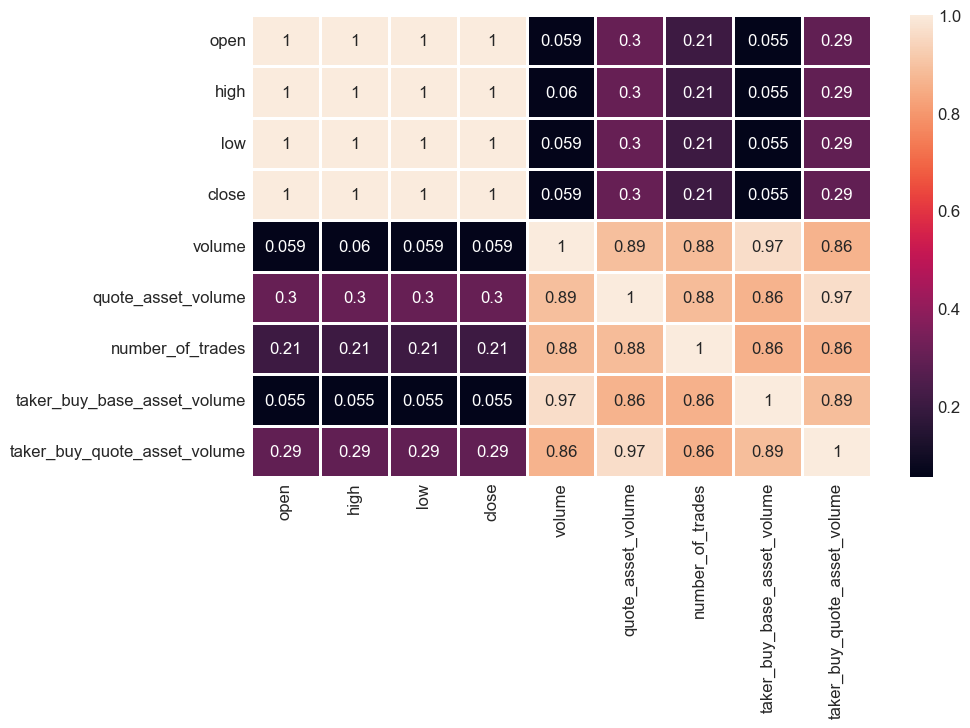

In [19]:
fig,ax=plt.subplots(1,1,figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

## Analysis for each day

In [20]:
#split timestamp into date and time
df['date'] = [d.date() for d in df.index]
df['time'] = [d.time() for d in df.index]


In [21]:
df.reset_index(drop=False, inplace=True)
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date,time
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851,2017-08-17,04:00:00
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000,2017-08-17,04:01:00
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921,2017-08-17,04:02:00
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852,2017-08-17,04:03:00
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338,2017-08-17,04:04:00


In [22]:
df.set_index(['date', 'time'])

timestamp      open      high       low   
date       time                                                         
2017-08-17 04:00:00 2017-08-17 04:00:00   4261.48   4261.48   4261.48  \
           04:01:00 2017-08-17 04:01:00   4261.48   4261.48   4261.48   
           04:02:00 2017-08-17 04:02:00   4280.56   4280.56   4280.56   
           04:03:00 2017-08-17 04:03:00   4261.48   4261.48   4261.48   
           04:04:00 2017-08-17 04:04:00   4261.48   4261.48   4261.48   
...                                 ...       ...       ...       ...   
2023-08-01 13:15:00 2023-08-01 13:15:00  28896.00  28907.42  28893.03   
           13:16:00 2023-08-01 13:16:00  28907.41  28912.74  28907.41   
           13:17:00 2023-08-01 13:17:00  28908.52  28908.53  28902.48   
           13:18:00 2023-08-01 13:18:00  28902.48  28902.49  28902.48   
           13:19:00 2023-08-01 13:19:00  28902.48  28902.49  28902.48   

                        close     volume  quote_asset_volume   
date       time                                                
2017-08-17 04:00:00   4261.48   1.775183        7.564907e+03  \
           04:01:00   4261.48   0.000000        0.000000e+00   
           04:02:00   4280.56   0.261074        1.117543e+03   
           04:03:00   4261.48   0.012008        5.117185e+01   
           04:04:00   4261.48   0.140796        5.999993e+02   
...                       ...        ...                 ...   
2023-08-01 13:15:00  28907.41  37.746570        1.090761e+06   
           13:16:00  28908.53  15.896100        4.595556e+05   
           13:17:00  28902.49  11.522630        3.330532e+05   
           13:18:00  28902.49   4.775890        1.380351e+05   
           13:19:00  28902.49   4.686580        1.354538e+05   

                     number_of_trades  taker_buy_base_asset_volume   
date       time                                                      
2017-08-17 04:00:00                 3                     0.075183  \
           04:01:00                 0                     0.000000   
           04:02:00                 2                     0.261074   
           04:03:00                 3                     0.012008   
           04:04:00                 1                     0.140796   
...                               ...                          ...   
2023-08-01 13:15:00               686                    16.504520   
           13:16:00               483                    10.229810   
           13:17:00               451                     2.708730   
           13:18:00               317                     2.245460   
           13:19:00               258                     0.893910   

                     taker_buy_quote_asset_volume  
date       time                                    
2017-08-17 04:00:00                    320.390851  
           04:01:00                      0.000000  
           04:02:00                   1117.542921  
           04:03:00                     51.171852  
           04:04:00                    599.999338  
...                                           ...  
2023-08-01 13:15:00                 476955.246611  
           13:16:00                 295738.166916  
           13:17:00                  78290.170121  
           13:18:00                  64899.385195  
           13:19:00                  25836.224836  

[3126000 rows x 10 columns]

Plot the price

In [31]:
def plot_price_volume(str_date):    
    user_date = datetime.datetime.strptime(str_date, '%Y-%m-%d').date()

    data = df.loc[df['date'] == user_date]
    data = data.set_index('timestamp')

    plot = mpf.plot(data, type='line', volume=True, mav = 60,  show_nontrading=True, title='Bitcoin Price & Volume on ' + str(user_date), style='yahoo')
    return plot


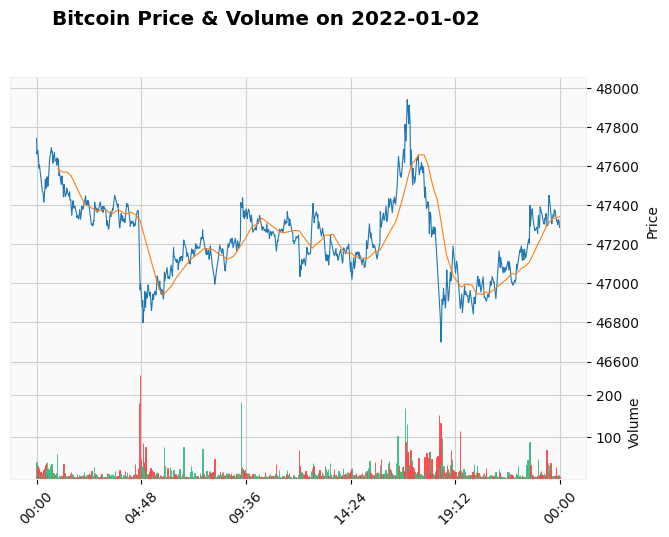

In [32]:
plot_price_volume('2022-01-02')

Statistics for the day

In [30]:
def summary_stats(str_date):
    user_date = datetime.datetime.strptime(str_date, '%Y-%m-%d').date()

    data = df.loc[df['date'] == user_date]

    summary = data.describe()
    summary = summary.drop(['timestamp'], axis = 1)
    summary = summary.astype(int)
    return summary


In [33]:
summary_stats('2022-01-02')

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,1440,1440,1440,1440,1440,1440,1440,1440,1440
mean,47237,47254,47219,47237,12,601813,492,6,300821
min,46700,46739,46654,46700,1,52651,149,0,15396
25%,47109,47124,47093,47109,5,240329,329,2,104020
50%,47227,47241,47215,47227,8,386701,416,3,176788
75%,47358,47376,47339,47358,14,667442,536,6,318230
max,47938,47990,47897,47939,249,11730057,4968,136,6535454
std,196,197,195,195,16,802592,350,9,443763


## Price rises 

In [63]:
#display data for 2022-01-02
data = df.loc[df['date'] == datetime.date(2022, 1, 2)]
data.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date,time
2295440,2022-01-02 00:00:00,47722.66,47750.00,47694.68,47740.70,42.12405,2.010188e+06,856,22.66142,1.081474e+06,2022-01-02,00:00:00
2295441,2022-01-02 00:01:00,47740.70,47740.70,47653.48,47660.81,22.58851,1.077778e+06,850,9.79076,4.671723e+05,2022-01-02,00:01:00
2295442,2022-01-02 00:02:00,47660.81,47714.16,47658.59,47687.80,22.11719,1.054642e+06,762,6.60029,3.147449e+05,2022-01-02,00:02:00
2295443,2022-01-02 00:03:00,47687.80,47728.95,47642.96,47679.48,30.58469,1.458685e+06,832,16.02305,7.642812e+05,2022-01-02,00:03:00
2295444,2022-01-02 00:04:00,47679.48,47706.81,47663.70,47672.36,6.42532,3.063591e+05,450,2.98829,1.424705e+05,2022-01-02,00:04:00


In [64]:
#display rows where close is greater than open
data[data['close'] > data['open']].head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,date,time
2295440,2022-01-02 00:00:00,47722.66,47750.00,47694.68,47740.70,42.12405,2.010188e+06,856,22.66142,1.081474e+06,2022-01-02,00:00:00
2295442,2022-01-02 00:02:00,47660.81,47714.16,47658.59,47687.80,22.11719,1.054642e+06,762,6.60029,3.147449e+05,2022-01-02,00:02:00
2295448,2022-01-02 00:08:00,47589.34,47604.56,47570.00,47604.56,13.53105,6.438744e+05,537,2.69107,1.280594e+05,2022-01-02,00:08:00
2295454,2022-01-02 00:14:00,47474.09,47525.92,47463.63,47517.62,10.67885,5.071052e+05,546,3.31001,1.572008e+05,2022-01-02,00:14:00
2295458,2022-01-02 00:18:00,47461.00,47477.71,47426.81,47463.75,19.97505,9.479305e+05,616,9.62339,4.567694e+05,2022-01-02,00:18:00


In [65]:
#keep track if the interval is a green candle or red candle
data['color'] = np.where(data['close'] > data['open'], 'green', 'red')
data.drop(['quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'], axis=1, inplace=True)
data.head()

C:\Users\crist\AppData\Local\Temp\ipykernel_18660\3703735337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['color'] = np.where(data['close'] > data['open'], 'green', 'red')
C:\Users\crist\AppData\Local\Temp\ipykernel_18660\3703735337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'], axis=1, inplace=True)


,timestamp,open,high,low,close,volume,date,time,color
2295440,2022-01-02 00:00:00,47722.66,47750.00,47694.68,47740.70,42.12405,2022-01-02,00:00:00,green
2295441,2022-01-02 00:01:00,47740.70,47740.70,47653.48,47660.81,22.58851,2022-01-02,00:01:00,red
2295442,2022-01-02 00:02:00,47660.81,47714.16,47658.59,47687.80,22.11719,2022-01-02,00:02:00,green
2295443,2022-01-02 00:03:00,47687.80,47728.95,47642.96,47679.48,30.58469,2022-01-02,00:03:00,red
2295444,2022-01-02 00:04:00,47679.48,47706.81,47663.70,47672.36,6.42532,2022-01-02,00:04:00,red


## Is volume any different between NYSE trading hours?

In [87]:
#time when volume is highest top 5
data.sort_values(by='volume', ascending=True).head(10)


,timestamp,open,high,low,close,volume,date,time,color
2295647,2022-01-02 03:27:00,47372.71,47372.71,47361.93,47363.30,1.11164,2022-01-02,03:27:00,red
2295826,2022-01-02 06:26:00,47106.86,47114.30,47105.48,47111.05,1.39208,2022-01-02,06:26:00,green
2295849,2022-01-02 06:49:00,47200.00,47202.53,47200.00,47200.01,1.45839,2022-01-02,06:49:00,green
2295633,2022-01-02 03:13:00,47322.43,47324.45,47319.91,47321.07,1.46459,2022-01-02,03:13:00,red
2296037,2022-01-02 09:57:00,47282.51,47285.01,47277.00,47280.29,1.54092,2022-01-02,09:57:00,red
2295664,2022-01-02 03:44:00,47390.01,47406.18,47387.01,47406.18,1.61703,2022-01-02,03:44:00,green
2296774,2022-01-02 22:14:00,47191.17,47195.00,47188.04,47191.32,1.65624,2022-01-02,22:14:00,green
2295705,2022-01-02 04:25:00,47313.37,47321.69,47313.37,47313.56,1.69133,2022-01-02,04:25:00,green
2295885,2022-01-02 07:25:00,47183.11,47183.78,47175.32,47178.84,1.70141,2022-01-02,07:25:00,red
2295838,2022-01-02 06:38:00,47138.05,47138.05,47122.69,47123.03,1.73929,2022-01-02,06:38:00,red


In [74]:
#function that returns the average NYSE volume and average volume outside of NYSE hours for a given date
def volume_means_NYSE(str_date):
    user_date = datetime.datetime.strptime(str_date, '%Y-%m-%d').date()
    data = df.loc[df['date'] == user_date]    
    NYSE_hours = data[(data['time'] >= datetime.time(9, 30, 0)) & (data['time'] <= datetime.time(16, 0, 0))]
    outside_NYSE_hours = data[(data['time'] < datetime.time(9, 30, 0)) | (data['time'] > datetime.time(16, 0, 0))]
    NYSE_volume = NYSE_hours['volume'].mean()
    outside_NYSE_volume = outside_NYSE_hours['volume'].mean()
    return NYSE_volume, outside_NYSE_volume


In [91]:
volume_means_NYSE('2017-08-23')

(0.7921296086956521, 0.6591171477597713)

In [75]:
#collect average NYSE volume and average volume outside of NYSE hours for each date
NYSE_volume_means = []
outside_NYSE_volume_means = []
for date in df['date'].unique():
    NYSE_volume_means.append(volume_means_NYSE(str(date))[0])
    outside_NYSE_volume_means.append(volume_means_NYSE(str(date))[1])

print(NYSE_volume_means[:10], outside_NYSE_volume_means[:10])

[0.6008032608695653, 0.6927361560102302, 0.26241241176470587, 0.12124906393861892, 0.165269547314578, 0.8361628900255755, 0.7921296086956521, 0.6999119769820971, 0.5360208797953964, 0.14540554219948848] [0.6925046996291718, 0.8856324375595805, 0.265687807435653, 0.4000711515729266, 0.5978290438512869, 0.6098619332697807, 0.6591171477597713, 0.4897551668255481, 0.34702438131553864, 0.1632550057197331]


In [109]:
#remove nan values
NYSE_volume_means = np.array(NYSE_volume_means)

np.isnan(NYSE_volume_means).any()
NYSE_volume_means = NYSE_volume_means[~np.isnan(NYSE_volume_means)]
np.isnan(NYSE_volume_means).any()

False

Text(0.5, 1.0, 'Histogram of Volume Means')

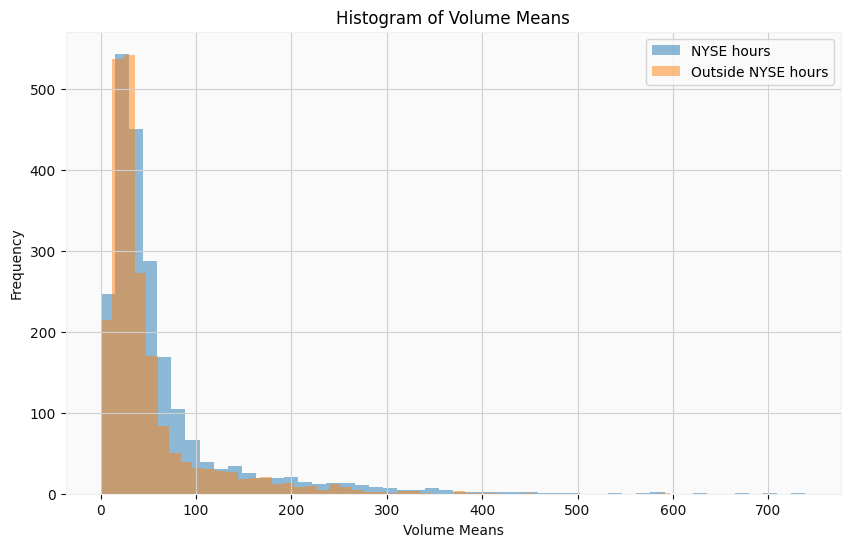

In [110]:
#pdf of NYSE volume means and outside NYSE volume means
plt.figure(figsize=(10,6))
plt.hist(NYSE_volume_means, bins=50, alpha=0.5, label='NYSE hours')
plt.hist(outside_NYSE_volume_means, bins=50, alpha=0.5, label='Outside NYSE hours')
plt.legend(loc='upper right')
plt.xlabel('Volume Means')
plt.ylabel('Frequency')
plt.title('Histogram of Volume Means')

In [111]:
#hypothesis test
from scipy.stats import ttest_ind
ttest_ind(NYSE_volume_means, outside_NYSE_volume_means)

Ttest_indResult(statistic=6.927026915156235, pvalue=4.927944021395411e-12)

NO

### Decision Tree Regression (target: volume)

In [116]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df.drop(['volume','quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'date', 'time','timestamp'], axis=1)
y = df['volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

tree.score(X_test, y_test)


0.19785088158064734

Text(0.5, 1.0, 'Actual vs Predicted Volume')

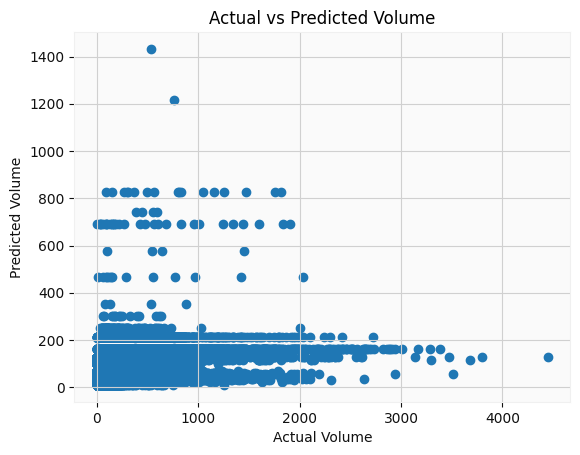

In [117]:
#plot actual vs predicted volume
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Volume')


In [118]:
#random forest regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForestRegressor(n_estimators=100, max_depth=5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

forest.score(X_test, y_test)

0.19972542109600777

Text(0.5, 1.0, 'Actual vs Predicted Volume')

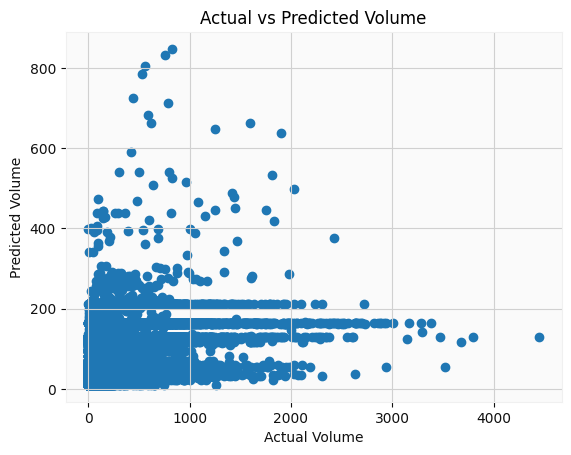

In [119]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Volume')
plt.ylabel('Predicted Volume')
plt.title('Actual vs Predicted Volume')

##